In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from PIL import Image
import os
import glob
import cv2
from glob import glob

In [44]:
IMG_HEIGHT, IMG_WIDTH = 256, 256

def preprocess(img_path, mask_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"Warning: Could not read image {img_path}")
        return None, None
    img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))
    img = img.astype(np.float32) / 255.0
    img = np.expand_dims(img, axis=-1)

    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    if mask is None:
        print(f"Warning: Could not read mask {mask_path}. Using blank mask.")
        mask = np.zeros((IMG_HEIGHT, IMG_WIDTH), dtype=np.uint8)
    else:
        mask = cv2.resize(mask, (IMG_WIDTH, IMG_HEIGHT))

    mask = (mask > 128).astype(np.float32) # Ensure binary mask {0, 1}
    # mask = mask.astype(np.float32) / 255.0 # Alternative if using values between 0 and 1
    mask = np.expand_dims(mask, axis=-1)
    return img, mask

In [54]:
import os
import numpy as np
from glob import glob
from sklearn.model_selection import train_test_split

def load_dataset(dataset_name):
    X, Y, F = [], [], []

    if dataset_name == "DeepCrack":
        root = "Dataset/DeepCrack"
        for folder in ["train", "test"]:
            img_folder = os.path.join(root, f"{folder}_img")
            mask_folder = os.path.join(root, f"{folder}_lab")
            for img_path in sorted(glob(f"{img_folder}/*.jpg")):
                base = os.path.basename(img_path).replace('.jpg', '.png')
                mask_path = os.path.join(mask_folder, base)
                img, mask = preprocess(img_path, mask_path)
                X.append(img)
                Y.append(mask)
                F.append(os.path.basename(img_path))

    elif dataset_name == "Crack500":
        root = "Dataset/Crack500"
        for split in ["traincrop", "valcrop", "testcrop"]:
            paths = sorted(glob(f"{root}/{split}/*.jpg"))
            for img_path in paths:
                mask_path = img_path.replace('.jpg', '.png')
                img, mask = preprocess(img_path, mask_path)
                X.append(img)
                Y.append(mask)
                F.append(os.path.basename(img_path))

    elif dataset_name == "CFD":
        img_folder = "Dataset/CFD/cfd_image"
        mask_folder = "Dataset/CFD/seg_gt"
        for img_path in sorted(glob(f"{img_folder}/*.jpg")):
            base = os.path.basename(img_path).replace('.jpg', '.png')
            mask_path = os.path.join(mask_folder, base)
            img, mask = preprocess(img_path, mask_path)
            X.append(img)
            Y.append(mask)
            F.append(os.path.basename(img_path))

    elif dataset_name == "CrackTree200":
        img_folder = "Dataset/Cracktree200/cracktree200rgb"
        mask_folder = "Dataset/Cracktree200/cracktree200_gt"
        for img_path in sorted(glob(f"{img_folder}/*.jpg")):
            base = os.path.basename(img_path).replace('.jpg', '.png')
            mask_path = os.path.join(mask_folder, base)
            img, mask = preprocess(img_path, mask_path)
            X.append(img)
            Y.append(mask)
            F.append(os.path.basename(img_path))

    elif dataset_name == "AEL":
        root = "Dataset/AEL"
        for subfolder in ["AIGLE_RN", "ESAR", "LCMS"]:
            img_folder = os.path.join(root, "img", subfolder)
            mask_folder = os.path.join(root, "gt", subfolder)
            for img_path in sorted(glob(f"{img_folder}/*.jpg")):
                base = os.path.basename(img_path).replace('.jpg', '.png')
                mask_path = os.path.join(mask_folder, base)
                if os.path.exists(mask_path):
                    img, mask = preprocess(img_path, mask_path)
                    if img is not None and mask is not None:
                        X.append(img)
                        Y.append(mask)
                        F.append(os.path.basename(img_path))

    elif dataset_name == "GAPS384":
        img_folder = "Dataset/Gaps384/croppedimg"
        mask_folder = "Dataset/Gaps384/croppedgt"
        for img_path in sorted(glob(f"{img_folder}/*.jpg")):
            base = os.path.basename(img_path).replace('.jpg', '.png')
            mask_path = os.path.join(mask_folder, base)
            img, mask = preprocess(img_path, mask_path)
            X.append(img)
            Y.append(mask)
            F.append(os.path.basename(img_path))

    # Convert to arrays
    X = np.array(X)
    Y = np.array(Y)
    F = np.array(F)

    # Sanity check
    if len(X) == 0 or len(Y) == 0:
        print(f"⚠️  No valid data found for {dataset_name}. Skipping...")
        return None, None, None, None, None, None

    # Split
    X_train, X_test, Y_train, Y_test, F_train, F_test = train_test_split(X, Y, F, test_size=0.2, random_state=42)
    print(f"✅ Loaded {len(X)} samples from {dataset_name}")
    return X_train, X_test, Y_train, Y_test, F_train, F_test


In [9]:
!pip install tensorflow

DEPRECATION: Loading egg at /usr/local/lib/python3.12/dist-packages/opt_einsum-3.4.0-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /usr/local/lib/python3.12/dist-packages/dill-0.3.9-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /usr/local/lib/python3.12/dist-packages/igraph-0.11.8-py3.12-linux-x86_64.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /usr/local/lib/python3.12/dist-packages/lightning_thunder-0.2.0.dev0-py3.12.egg is deprecated. pip 25.1 wil

In [10]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Conv2DTranspose, concatenate, Input
from tensorflow.keras.models import Model

def build_unet(input_shape=(256, 256, 1)):
    inputs = Input(input_shape)

    # Encoder
    c1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
    c1 = Conv2D(64, 3, activation='relu', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(128, 3, activation='relu', padding='same')(p1)
    c2 = Conv2D(128, 3, activation='relu', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = Conv2D(256, 3, activation='relu', padding='same')(p2)
    c3 = Conv2D(256, 3, activation='relu', padding='same')(c3)
    p3 = MaxPooling2D((2, 2))(c3)

    c4 = Conv2D(512, 3, activation='relu', padding='same')(p3)
    c4 = Conv2D(512, 3, activation='relu', padding='same')(c4)
    p4 = MaxPooling2D(pool_size=(2, 2))(c4)

    # Bottleneck
    c5 = Conv2D(1024, 3, activation='relu', padding='same')(p4)
    c5 = Conv2D(1024, 3, activation='relu', padding='same')(c5)

    # Decoder
    u6 = Conv2DTranspose(512, 2, strides=(2, 2), padding='same')(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(512, 3, activation='relu', padding='same')(u6)
    c6 = Conv2D(512, 3, activation='relu', padding='same')(c6)

    u7 = Conv2DTranspose(256, 2, strides=(2, 2), padding='same')(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(256, 3, activation='relu', padding='same')(u7)
    c7 = Conv2D(256, 3, activation='relu', padding='same')(c7)

    u8 = Conv2DTranspose(128, 2, strides=(2, 2), padding='same')(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(128, 3, activation='relu', padding='same')(u8)
    c8 = Conv2D(128, 3, activation='relu', padding='same')(c8)

    u9 = Conv2DTranspose(64, 2, strides=(2, 2), padding='same')(c8)
    u9 = concatenate([u9, c1])
    c9 = Conv2D(64, 3, activation='relu', padding='same')(u9)
    c9 = Conv2D(64, 3, activation='relu', padding='same')(c9)

    outputs = Conv2D(1, 1, activation='sigmoid')(c9)

    model = Model(inputs=[inputs], outputs=[outputs])
    return model

In [11]:
model_unet = build_unet()
model_unet.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_unet.summary()

I0000 00:00:1745600788.935630  366687 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 78682 MB memory:  -> device: 0, name: NVIDIA H100 80GB HBM3, pci bus id: 0000:61:00.0, compute capability: 9.0


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 256, 256,  │        640 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 256, 256,  │     36,928 │ conv2d[0][0]      │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 128, 128,  │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 128, 128,  │     73,856 │ max_pooling2d[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 128, 128,  │    147,584 │ conv2d_2[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 64, 64,    │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 64, 64,    │    295,168 │ max_pooling2d_1[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 64, 64,    │    590,080 │ conv2d_4[0][0]    │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 32, 32,    │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 32, 32,    │  1,180,160 │ max_pooling2d_2[… │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 32, 32,    │  2,359,808 │ conv2d_6[0][0]    │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 16, 16,    │          0 │ conv2d_7[0][0]    │
│ (MaxPooling2D)      │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 16, 16,    │  4,719,616 │ max_pooling2d_3[… │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 16, 16,    │  9,438,208 │ conv2d_8[0][0]    │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose    │ (None, 32, 32,    │  2,097,664 │ conv2d_9[0][0]    │
│ (Conv2DTranspose)   │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 32, 32,    │          0 │ conv2d_transpose

 Total params: 31,030,593 (118.37 MB)

 Trainable params: 31,030,593 (118.37 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
from tensorflow.keras.layers import Activation, UpSampling2D, Add, Multiply, BatchNormalization, Lambda
import tensorflow.keras.backend as K

def attention_gate(x, g, inter_channels=None):
    if inter_channels is None:
        inter_channels = x.shape[-1]  # default to encoder skip channels

    theta_x = Conv2D(inter_channels, (1, 1), strides=(1, 1), padding='same')(x)
    phi_g = Conv2D(inter_channels, (1, 1), strides=(1, 1), padding='same')(g)

    add = Add()([theta_x, phi_g])
    relu = Activation('relu')(add)
    psi = Conv2D(1, (1, 1), strides=(1, 1), padding='same')(relu)
    sigmoid = Activation('sigmoid')(psi)

    att = Multiply()([x, sigmoid])
    return att


In [13]:
def build_attention_unet(input_shape=(256, 256, 1)):
    inputs = Input(input_shape)

    # Encoder
    c1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
    c1 = Conv2D(64, 3, activation='relu', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(128, 3, activation='relu', padding='same')(p1)
    c2 = Conv2D(128, 3, activation='relu', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = Conv2D(256, 3, activation='relu', padding='same')(p2)
    c3 = Conv2D(256, 3, activation='relu', padding='same')(c3)
    p3 = MaxPooling2D((2, 2))(c3)

    c4 = Conv2D(512, 3, activation='relu', padding='same')(p3)
    c4 = Conv2D(512, 3, activation='relu', padding='same')(c4)
    p4 = MaxPooling2D(pool_size=(2, 2))(c4)

    # Bottleneck
    c5 = Conv2D(1024, 3, activation='relu', padding='same')(p4)
    c5 = Conv2D(1024, 3, activation='relu', padding='same')(c5)

    # Decoder with Attention
    u6 = Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(c5)
    a4 = attention_gate(c4, u6, 256)
    u6 = concatenate([u6, a4])
    c6 = Conv2D(512, 3, activation='relu', padding='same')(u6)
    c6 = Conv2D(512, 3, activation='relu', padding='same')(c6)

    u7 = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(c6)
    a3 = attention_gate(c3, u7, 128)
    u7 = concatenate([u7, a3])
    c7 = Conv2D(256, 3, activation='relu', padding='same')(u7)
    c7 = Conv2D(256, 3, activation='relu', padding='same')(c7)

    u8 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c7)
    a2 = attention_gate(c2, u8, 64)
    u8 = concatenate([u8, a2])
    c8 = Conv2D(128, 3, activation='relu', padding='same')(u8)
    c8 = Conv2D(128, 3, activation='relu', padding='same')(c8)

    u9 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c8)
    a1 = attention_gate(c1, u9, 32)
    u9 = concatenate([u9, a1])
    c9 = Conv2D(64, 3, activation='relu', padding='same')(u9)
    c9 = Conv2D(64, 3, activation='relu', padding='same')(c9)

    outputs = Conv2D(1, 1, activation='sigmoid')(c9)

    return Model(inputs=[inputs], outputs=[outputs])


In [14]:
model_attunet = build_attention_unet()
model_attunet.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_attunet.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_19 (Conv2D)  │ (None, 256, 256,  │        640 │ input_layer_1[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_20 (Conv2D)  │ (None, 256, 256,  │     36,928 │ conv2d_19[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 128, 128,  │          0 │ conv2d_20[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_21 (Conv2D)  │ (None, 128, 128,  │     73,856 │ max_pooling2d_4[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_22 (Conv2D)  │ (None, 128, 128,  │    147,584 │ conv2d_21[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_5     │ (None, 64, 64,    │          0 │ conv2d_22[0][0]   │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_23 (Conv2D)  │ (None, 64, 64,    │    295,168 │ max_pooling2d_5[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_24 (Conv2D)  │ (None, 64, 64,    │    590,080 │ conv2d_23[0][0]   │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_6     │ (None, 32, 32,    │          0 │ conv2d_24[0][0]   │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_25 (Conv2D)  │ (None, 32, 32,    │  1,180,160 │ max_pooling2d_6[… │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_26 (Conv2D)  │ (None, 32, 32,    │  2,359,808 │ conv2d_25[0][0]   │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_7     │ (None, 16, 16,    │          0 │ conv2d_26[0][0]   │
│ (MaxPooling2D)      │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_27 (Conv2D)  │ (None, 16, 16,    │  4,719,616 │ max_pooling2d_7[… │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_28 (Conv2D)  │ (None, 16, 16,    │  9,438,208 │ conv2d_27[0][0]   │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_4  │ (None, 32, 32,    │  2,097,664 │ conv2d_28[0][0]   │
│ (Conv2DTranspose)   │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_29 (Conv2D)  │ (None, 32, 32,    │    131,328 │ conv2d_26[0][0] 

 Total params: 31,380,197 (119.71 MB)

 Trainable params: 31,380,197 (119.71 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
from tensorflow.keras.layers import Add

def residual_block(x, filters):
    shortcut = x
    x = Conv2D(filters, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(filters, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)

    # Adjust shortcut channels to match x if needed
    shortcut = Conv2D(filters, (1, 1), padding='same')(shortcut)

    x = Add()([shortcut, x])
    return x


In [16]:
def build_raunet(input_shape=(256, 256, 1)):
    inputs = Input(input_shape)

    # Encoder
    c1 = Conv2D(64, 3, padding='same', activation='relu')(inputs)
    c1 = residual_block(c1, 64)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(128, 3, padding='same', activation='relu')(p1)
    c2 = residual_block(c2, 128)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = Conv2D(256, 3, padding='same', activation='relu')(p2)
    c3 = residual_block(c3, 256)
    p3 = MaxPooling2D((2, 2))(c3)

    c4 = Conv2D(512, 3, padding='same', activation='relu')(p3)
    c4 = residual_block(c4, 512)
    p4 = MaxPooling2D((2, 2))(c4)

    # Bottleneck
    c5 = Conv2D(1024, 3, padding='same', activation='relu')(p4)
    c5 = residual_block(c5, 1024)

    # Decoder with Residual + Attention
    u6 = Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(c5)
    a4 = attention_gate(c4, u6, 256)
    u6 = concatenate([u6, a4])
    u6 = Conv2D(512, (1, 1), activation='relu', padding='same')(u6)
    c6 = residual_block(u6, 512)

    u7 = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(c6)
    a3 = attention_gate(c3, u7, 128)
    u7 = concatenate([u7, a3])
    c7 = residual_block(u7, 256)

    u8 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c7)
    a2 = attention_gate(c2, u8, 64)
    u8 = concatenate([u8, a2])
    c8 = residual_block(u8, 128)

    u9 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c8)
    a1 = attention_gate(c1, u9, 32)
    u9 = concatenate([u9, a1])
    c9 = residual_block(u9, 64)

    outputs = Conv2D(1, 1, activation='sigmoid')(c9)

    return Model(inputs=[inputs], outputs=[outputs])


In [17]:
model_raunet = build_raunet()
model_raunet.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_raunet.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_50 (Conv2D)  │ (None, 256, 256,  │        640 │ input_layer_2[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_51 (Conv2D)  │ (None, 256, 256,  │     36,928 │ conv2d_50[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 256, 256,  │        256 │ conv2d_51[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_52 (Conv2D)  │ (None, 256, 256,  │     36,928 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_53 (Conv2D)  │ (None, 256, 256,  │      4,160 │ conv2d_50[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256, 256,  │        256 │ conv2d_52[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_4 (Add)         │ (None, 256, 256,  │          0 │ conv2d_53[0][0],  │
│                     │ 64)               │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_8     │ (None, 128, 128,  │          0 │ add_4[0][0]       │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_54 (Conv2D)  │ (None, 128, 128,  │     73,856 │ max_pooling2d_8[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_55 (Conv2D)  │ (None, 128, 128,  │    147,584 │ conv2d_54[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        512 │ conv2d_55[0][0]   │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_56 (Conv2D)  │ (None, 128, 128,  │    147,584 │ batch_normalizat… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_57 (Conv2D)  │ (None, 128, 128,  │     16,512 │ conv2d_54[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        512 │ conv2d_56[0][0]   │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_5 (Add)         │ (None, 128, 128,  │          0 │ conv2d_57[0][0],  │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_9     │ (None, 64, 64,    │          0 │ add_5[0][0]     

 Total params: 43,975,717 (167.75 MB)

 Trainable params: 43,963,941 (167.71 MB)

 Non-trainable params: 11,776 (46.00 KB)

In [18]:
from tensorflow.keras.layers import (
    LayerNormalization, Dense, Dropout, MultiHeadAttention, Flatten,
    Conv2D, Input, MaxPooling2D, UpSampling2D, concatenate, Reshape
)
from tensorflow.keras.models import Model


In [19]:
from tensorflow.keras.layers import LayerNormalization, Dense, Dropout, MultiHeadAttention, Flatten

def transformer_encoder(inputs, num_heads=4, ff_dim=512, dropout=0.1):
    attention = MultiHeadAttention(num_heads=num_heads, key_dim=inputs.shape[-1])(inputs, inputs)
    attention = Dropout(dropout)(attention)
    x = LayerNormalization(epsilon=1e-6)(inputs + attention)

    ff = Dense(ff_dim, activation='relu')(x)
    ff = Dense(inputs.shape[-1])(ff)
    ff = Dropout(dropout)(ff)
    x = LayerNormalization(epsilon=1e-6)(x + ff)
    return x


In [20]:
def patch_embedding(x, patch_size):
    patches = Conv2D(256, kernel_size=patch_size, strides=patch_size, padding='valid')(x)
    h, w, c = patches.shape[1], patches.shape[2], patches.shape[3]
    x = Reshape((h * w, c))(patches)
    return x, h, w


In [21]:
def build_transunet(input_shape=(256, 256, 1), patch_size=4, num_layers=4, ff_dim=512):
    inputs = Input(shape=input_shape)

    # CNN Encoder
    x = Conv2D(64, 3, activation='relu', padding='same')(inputs)
    x = Conv2D(64, 3, activation='relu', padding='same')(x)
    skip1 = x  # (256, 256, 64)
    x = MaxPooling2D()(x)  # (128, 128, 64)

    x = Conv2D(128, 3, activation='relu', padding='same')(x)
    x = Conv2D(128, 3, activation='relu', padding='same')(x)
    skip2 = x  # (128, 128, 128)
    x = MaxPooling2D()(x)  # (64, 64, 128)

    # Patch Embedding
    x = Conv2D(256, kernel_size=patch_size, strides=patch_size, padding='valid')(x)  # (16, 16, 256)
    h, w, c = x.shape[1], x.shape[2], x.shape[3]
    x = Reshape((h * w, c))(x)  # (batch, 256, 256)

    # Transformer Encoder
    for _ in range(num_layers):
        x = transformer_encoder(x, num_heads=4, ff_dim=ff_dim)

    x = Reshape((h, w, 256))(x)  # (16, 16, 256)

    # Decoder
    x = UpSampling2D(size=(2, 2))(x)  # (32, 32)
    x = Conv2D(256, 3, activation='relu', padding='same')(x)

    x = UpSampling2D(size=(2, 2))(x)  # (64, 64)
    x = Conv2D(128, 3, activation='relu', padding='same')(x)

    # skip2 is (128, 128), upsample x to match
    x = UpSampling2D(size=(2, 2))(x)  # (128, 128)
    skip2 = Conv2D(128, 1, activation='relu', padding='same')(skip2)
    x = concatenate([x, skip2])
    x = Conv2D(128, 3, activation='relu', padding='same')(x)

    x = UpSampling2D(size=(2, 2))(x)  # (256, 256)
    skip1 = Conv2D(64, 1, activation='relu', padding='same')(skip1)
    x = concatenate([x, skip1])
    x = Conv2D(64, 3, activation='relu', padding='same')(x)

    outputs = Conv2D(1, (1, 1), activation='sigmoid')(x)

    return Model(inputs=inputs, outputs=outputs)


In [22]:
model_transunet = build_transunet()
model_transunet.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_transunet.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_96 (Conv2D)  │ (None, 256, 256,  │        640 │ input_layer_3[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_97 (Conv2D)  │ (None, 256, 256,  │     36,928 │ conv2d_96[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_12    │ (None, 128, 128,  │          0 │ conv2d_97[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_98 (Conv2D)  │ (None, 128, 128,  │     73,856 │ max_pooling2d_12… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_99 (Conv2D)  │ (None, 128, 128,  │    147,584 │ conv2d_98[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_13    │ (None, 64, 64,    │          0 │ conv2d_99[0][0]   │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_100 (Conv2D) │ (None, 16, 16,    │    524,544 │ max_pooling2d_13… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape (Reshape)   │ (None, 256, 256)  │          0 │ conv2d_100[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 256, 256)  │  1,051,904 │ reshape[0][0],    │
│ (MultiHeadAttentio… │                   │            │ reshape[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 256, 256)  │          0 │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_17 (Add)        │ (None, 256, 256)  │          0 │ reshape[0][0],    │
│                     │                   │            │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalization │ (None, 256, 256)  │        512 │ add_17[0][0]      │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 256, 512)  │    131,584 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 256, 256)  │    131,328 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 256, 256)  │          0 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_18 (Add)        │ (None, 256, 256)  │          0 │ layer_normalizat… │
│                     │                   │            │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 256, 256)  │        512 │ add_18[0][0]      │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 7,358,465 (28.07 MB)

 Trainable params: 7,358,465 (28.07 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
!pip install einops

DEPRECATION: Loading egg at /usr/local/lib/python3.12/dist-packages/opt_einsum-3.4.0-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /usr/local/lib/python3.12/dist-packages/dill-0.3.9-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /usr/local/lib/python3.12/dist-packages/igraph-0.11.8-py3.12-linux-x86_64.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /usr/local/lib/python3.12/dist-packages/lightning_thunder-0.2.0.dev0-py3.12.egg is deprecated. pip 25.1 wil

In [24]:
from tensorflow.keras.layers import LayerNormalization, Dropout, Dense
from einops import rearrange
from tensorflow.keras import layers


In [25]:
import tensorflow as tf

def window_partition_tf(x, window_size):
    B = tf.shape(x)[0]
    H = tf.shape(x)[1]
    W = tf.shape(x)[2]
    C = tf.shape(x)[3]
    x = tf.reshape(x, (B, H // window_size, window_size, W // window_size, window_size, C))
    x = tf.transpose(x, [0, 1, 3, 2, 4, 5])  # B, num_h, num_w, w_h, w_w, C
    windows = tf.reshape(x, (-1, window_size * window_size, C))
    return windows

def window_reverse_tf(windows, window_size, H, W, C):
    B = tf.shape(windows)[0] // ((H // window_size) * (W // window_size))
    x = tf.reshape(windows, (B, H // window_size, W // window_size, window_size, window_size, C))
    x = tf.transpose(x, [0, 1, 3, 2, 4, 5])
    x = tf.reshape(x, (B, H, W, C))
    return x


In [26]:
from tensorflow.keras.layers import Input, Lambda, Add, MultiHeadAttention, LayerNormalization, Dense, Dropout, Conv2D, Layer

def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = Dense(units, activation='gelu')(x)
        x = Dropout(dropout_rate)(x)
    return x

class RollLayer(Layer):
    def __init__(self, shift, axis, **kwargs):
        super(RollLayer, self).__init__(**kwargs)
        self.shift = shift
        self.axis = axis

    def call(self, inputs):
        return tf.roll(inputs, shift=self.shift, axis=self.axis)

def swin_block(x, window_size=8, shift_size=0, num_heads=4, embed_dim=128, mlp_dim=256):
    input_channels = x.shape[-1]
    H, W = x.shape[1], x.shape[2]

    shortcut = x
    x = LayerNormalization(epsilon=1e-6)(x)

    if shift_size > 0:
        # Use the custom RollLayer
        x = RollLayer(shift=[-shift_size, -shift_size], axis=[1, 2])(x)

    x_windows = Lambda(
        lambda t: window_partition_tf(t, window_size),
        output_shape=(window_size * window_size, input_channels)
    )(x)

    attn_windows = MultiHeadAttention(num_heads=num_heads, key_dim=input_channels)(x_windows, x_windows)

    x = Lambda(
        lambda t: window_reverse_tf(t, window_size, H, W, input_channels),
        output_shape=(H, W, input_channels)
    )(attn_windows)

    if shift_size > 0:
        # Use the custom RollLayer
        x = RollLayer(shift=[shift_size, shift_size], axis=[1, 2])(x)

    # Project shortcut if needed
    if shortcut.shape[-1] != x.shape[-1]:
        shortcut = Conv2D(filters=int(x.shape[-1]), kernel_size=1, padding='same')(shortcut)

    # Project mlp output to match input channels
    mlp_output = mlp(LayerNormalization(epsilon=1e-6)(x), [mlp_dim], 0.1)
    mlp_output = Conv2D(filters=int(x.shape[-1]), kernel_size=1, padding='same')(mlp_output)  # Adjust channels

    x = Add()([shortcut, x])
    x = Add()([x, mlp_output])  # Use the projected mlp_output

    return x

In [27]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import MaxPooling2D, UpSampling2D, concatenate, Conv2D

def build_swin_unet(input_shape=(256, 256, 1), num_blocks=2):
    inputs = Input(input_shape)

    # Encoder
    x = Conv2D(64, 3, activation='relu', padding='same')(inputs)
    skip1 = x
    x = MaxPooling2D()(x)

    x = Conv2D(128, 3, activation='relu', padding='same')(x)
    skip2 = x
    x = MaxPooling2D()(x)

    # Swin Transformer Blocks
    for i in range(num_blocks):
        x = swin_block(x, window_size=8, shift_size=(i % 2) * 4, embed_dim=128)

    # Decoder
    x = UpSampling2D()(x)
    skip2 = Conv2D(128, 1, activation='relu', padding='same')(skip2)
    x = concatenate([x, skip2])
    x = Conv2D(128, 3, activation='relu', padding='same')(x)

    x = UpSampling2D()(x)
    skip1 = Conv2D(64, 1, activation='relu', padding='same')(skip1)
    x = concatenate([x, skip1])
    x = Conv2D(64, 3, activation='relu', padding='same')(x)

    outputs = Conv2D(1, 1, activation='sigmoid')(x)
    return Model(inputs, outputs)


In [28]:
model_swin = build_swin_unet()
model_swin.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_swin.summary()


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_108 (Conv2D) │ (None, 256, 256,  │        640 │ input_layer_4[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_14    │ (None, 128, 128,  │          0 │ conv2d_108[0][0]  │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_109 (Conv2D) │ (None, 128, 128,  │     73,856 │ max_pooling2d_14… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_15    │ (None, 64, 64,    │          0 │ conv2d_109[0][0]  │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 64, 64,    │        256 │ max_pooling2d_15… │
│ (LayerNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda (Lambda)     │ (None, 64, 128)   │          0 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 64, 128)   │    263,808 │ lambda[0][0],     │
│ (MultiHeadAttentio… │                   │            │ lambda[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_1 (Lambda)   │ (None, 64, 64,    │          0 │ multi_head_atten… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 64, 64,    │        256 │ lambda_1[0][0]    │
│ (LayerNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 64, 64,    │     33,024 │ layer_normalizat… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_13          │ (None, 64, 64,    │          0 │ dense_8[0][0]     │
│ (Dropout)           │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_25 (Add)        │ (None, 64, 64,    │          0 │ max_pooling2d_15… │
│                     │ 128)              │            │ lambda_1[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_110 (Conv2D) │ (None, 64, 64,    │     32,896 │ dropout_13[0][0]  │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_26 (Add)        │ (None, 64, 64,    │          0 │ add_25[0][0],     │
│                     │ 128)              │            │ conv2d_110[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 64, 64,    │        256 │ add_26[0][0]      │
│ (LayerNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ roll_layer          │ (None, 64, 64,    │          0 │ layer_normalizat… │
│ (RollLayer)         │ 128)              │            │                 

 Total params: 1,161,409 (4.43 MB)

 Trainable params: 1,161,409 (4.43 MB)

 Non-trainable params: 0 (0.00 B)

In [47]:
def save_image(image_data, output_path):
    if image_data.dtype == np.float32 or image_data.max() <= 1.0:
        image_data = (image_data * 255).astype(np.uint8)
    elif image_data.dtype == np.uint8 and image_data.max() > 1:
        pass
    else:
        image_data = image_data.astype(np.uint8)

    if image_data.ndim == 3 and image_data.shape[-1] == 1:
        image_data = image_data.squeeze(-1)

    try:
        img = Image.fromarray(image_data)
        img.save(output_path)
        print(f"✅ Saved to: {output_path}")
    except Exception as e:
        print(f"❌ Error saving image: {e}")

📂 Working on dataset: DeepCrack
✅ Loaded 537 samples from DeepCrack
✅ DeepCrack: 429 train, 108 test samples
Unet
Epoch 1/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9891 - loss: 0.0299 - val_accuracy: 0.9880 - val_loss: 0.0330
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9882 - loss: 0.0313 - val_accuracy: 0.9883 - val_loss: 0.0319
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9880 - loss: 0.0316 - val_accuracy: 0.9879 - val_loss: 0.0340
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9875 - loss: 0.0336 - val_accuracy: 0.9870 - val_loss: 0.0372
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9885 - loss: 0.0315 - val_accuracy: 0.9876 - val_loss: 0.0340
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9886 - loss: 0.0302 - val_accuracy: 0.9869 - val_loss: 0.0357
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9881 - loss: 0.0316 - val_accuracy: 0.9870 - val_loss: 0.03

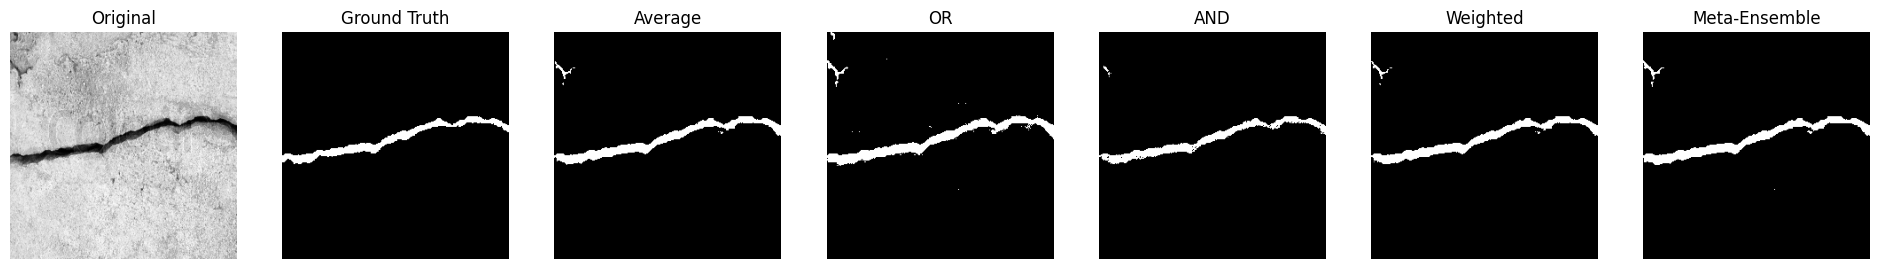

📂 Working on dataset: Crack500
✅ Loaded 3368 samples from Crack500
✅ Crack500: 2694 train, 674 test samples
Unet
Epoch 1/10
267/270 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9404 - loss: 0.1708

2025-04-25 18:15:41.671995: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-04-25 18:15:41.801804: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-04-25 18:15:42.715877: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-04-25 18:15:42.867783: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-04-25 18:15:43.689609: E external/local_xla/xla/stream_

270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.9404 - loss: 0.1705

2025-04-25 18:15:54.783620: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-04-25 18:15:54.914015: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-04-25 18:15:55.695719: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-04-25 18:15:55.847081: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-04-25 18:15:56.587295: E external/local_xla/xla/stream_

270/270 ━━━━━━━━━━━━━━━━━━━━ 23s 87ms/step - accuracy: 0.9405 - loss: 0.1704 - val_accuracy: 0.9537 - val_loss: 0.1305
Epoch 2/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.9554 - loss: 0.1270 - val_accuracy: 0.9537 - val_loss: 0.1306
Epoch 3/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.9572 - loss: 0.1199 - val_accuracy: 0.9547 - val_loss: 0.1281
Epoch 4/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.9572 - loss: 0.1220 - val_accuracy: 0.9556 - val_loss: 0.1235
Epoch 5/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.9567 - loss: 0.1220 - val_accuracy: 0.9565 - val_loss: 0.1221
Epoch 6/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.9565 - loss: 0.1223 - val_accuracy: 0.9566 - val_loss: 0.1206
Epoch 7/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.9570 - loss: 0.1191 - val_accuracy: 0.9568 - val_loss: 0.1199
Epoch 8/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.9584 - loss: 0.1170 - val_accuracy: 0.95

2025-04-25 18:20:18.013604: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_7', 64 bytes spill stores, 64 bytes spill loads

2025-04-25 18:20:18.500965: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_34', 112 bytes spill stores, 112 bytes spill loads

2025-04-25 18:20:18.593455: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_7', 36 bytes spill stores, 36 bytes spill loads

2025-04-25 18:20:18.645526: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_32', 112 bytes spill stores, 112 bytes spill loads

2025-04-25 18:20:18.929133: I external/local_x

270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.9491 - loss: 0.1511

2025-04-25 18:20:38.207110: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'input_reduce_select_fusion_1', 128 bytes spill stores, 124 bytes spill loads

2025-04-25 18:20:39.788502: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-04-25 18:20:39.914687: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


270/270 ━━━━━━━━━━━━━━━━━━━━ 35s 129ms/step - accuracy: 0.9491 - loss: 0.1511 - val_accuracy: 0.9541 - val_loss: 0.1306
Epoch 2/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.9544 - loss: 0.1303 - val_accuracy: 0.9542 - val_loss: 0.1311
Epoch 3/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9554 - loss: 0.1234 - val_accuracy: 0.9549 - val_loss: 0.1279
Epoch 4/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9558 - loss: 0.1241 - val_accuracy: 0.9521 - val_loss: 0.1317
Epoch 5/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9544 - loss: 0.1297 - val_accuracy: 0.9534 - val_loss: 0.1350
Epoch 6/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.9580 - loss: 0.1195 - val_accuracy: 0.9570 - val_loss: 0.1211
Epoch 7/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9553 - loss: 0.1244 - val_accuracy: 0.9568 - val_loss: 0.1225
Epoch 8/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9574 - loss: 0.1213 - val_accuracy: 0.9

2025-04-25 18:21:35.734701: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_22', 208 bytes spill stores, 208 bytes spill loads

2025-04-25 18:21:35.777777: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_22_0', 408 bytes spill stores, 396 bytes spill loads

2025-04-25 18:21:35.878194: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_22', 60 bytes spill stores, 60 bytes spill loads

2025-04-25 18:21:35.893283: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_45', 292 bytes spill stores, 292 bytes spill loads



270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.9384 - loss: 0.1931

2025-04-25 18:21:41.900865: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'input_add_reduce_fusion_7', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_add_reduce_fusion_4', 64 bytes spill stores, 64 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_add_reduce_fusion_3', 44 bytes spill stores, 44 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_reduce_select_fusion_1', 128 bytes spill stores, 124 bytes spill loads



270/270 ━━━━━━━━━━━━━━━━━━━━ 18s 65ms/step - accuracy: 0.9384 - loss: 0.1931 - val_accuracy: 0.9441 - val_loss: 0.1664
Epoch 2/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9461 - loss: 0.1610 - val_accuracy: 0.9453 - val_loss: 0.1600
Epoch 3/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9464 - loss: 0.1599 - val_accuracy: 0.9460 - val_loss: 0.1620
Epoch 4/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9480 - loss: 0.1529 - val_accuracy: 0.9461 - val_loss: 0.1588
Epoch 5/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9464 - loss: 0.1573 - val_accuracy: 0.9458 - val_loss: 0.1599
Epoch 6/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9469 - loss: 0.1555 - val_accuracy: 0.9454 - val_loss: 0.1584
Epoch 7/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9468 - loss: 0.1557 - val_accuracy: 0.9466 - val_loss: 0.1573
Epoch 8/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9487 - loss: 0.1513 - val_accuracy: 0.94

2025-04-25 18:22:27.286771: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-04-25 18:22:27.418117: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-04-25 18:22:28.325160: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-04-25 18:22:28.477124: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-04-25 18:22:29.248030: E external/local_xla/xla/stream_

22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 196ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step
21/22 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step

2025-04-25 18:22:38.418487: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_7', 188 bytes spill stores, 180 bytes spill loads

2025-04-25 18:22:39.643420: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_7', 36 bytes spill stores, 36 bytes spill loads

2025-04-25 18:22:39.704023: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_7', 36 bytes spill stores, 36 bytes spill loads

2025-04-25 18:22:39.770645: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_7', 140 bytes spill stores, 140 bytes spill loads

2025-04-25 18:22:39.954082: I external/local_xla

22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 345ms/step
21/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

2025-04-25 18:22:45.480271: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_15', 292 bytes spill stores, 292 bytes spill loads



22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 158ms/step
🧠 Meta-Ensemble Training...
Epoch 1/3
34478/34509 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - accuracy: 0.9598 - loss: 0.1298 

2025-04-25 18:23:32.222307: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_361', 1376 bytes spill stores, 1376 bytes spill loads



34509/34509 ━━━━━━━━━━━━━━━━━━━━ 50s 1ms/step - accuracy: 0.9598 - loss: 0.1297 - val_accuracy: 0.9601 - val_loss: 0.1092
Epoch 2/3
34509/34509 ━━━━━━━━━━━━━━━━━━━━ 53s 2ms/step - accuracy: 0.9604 - loss: 0.1090 - val_accuracy: 0.9604 - val_loss: 0.1090
Epoch 3/3
34509/34509 ━━━━━━━━━━━━━━━━━━━━ 53s 1ms/step - accuracy: 0.9604 - loss: 0.1090 - val_accuracy: 0.9605 - val_loss: 0.1090
43136/43136 ━━━━━━━━━━━━━━━━━━━━ 25s 569us/step
🖼️ Saving Meta-Ensemble Results...
✅ Saved to: Result/Crack500/meta_ensemble/20160329_104100_641_721_meta_ensemble_prediction.png
✅ Saved to: Result/Crack500/meta_ensemble/20160328_151429_1_721_meta_ensemble_prediction.png
✅ Saved to: Result/Crack500/meta_ensemble/20160306_103657_641_361_meta_ensemble_prediction.png
✅ Saved to: Result/Crack500/meta_ensemble/20160222_164825_1281_361_meta_ensemble_prediction.png
✅ Saved to: Result/Crack500/meta_ensemble/20160307_144931_641_361_meta_ensemble_prediction.png
✅ Saved to: Result/Crack500/meta_ensemble/20160307_145107

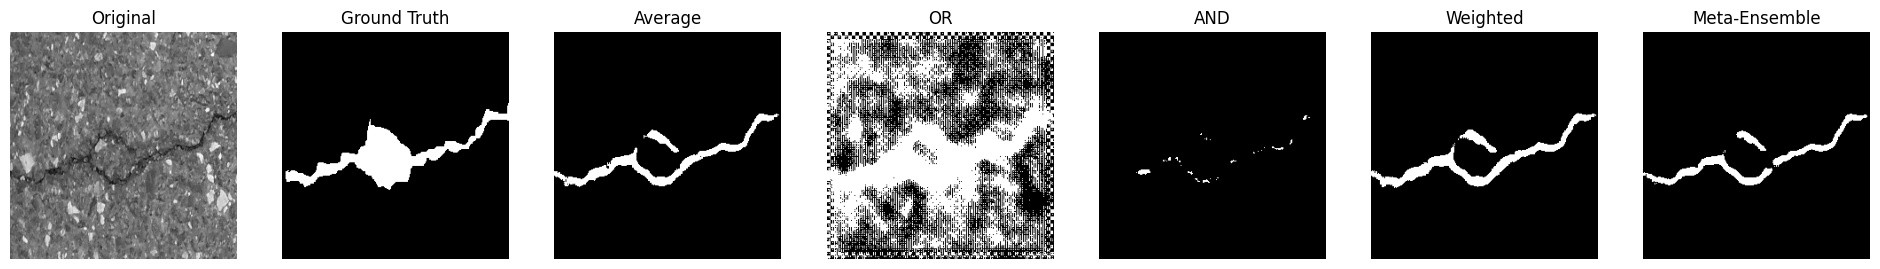

📂 Working on dataset: CrackTree200
✅ Loaded 206 samples from CrackTree200
✅ CrackTree200: 164 train, 42 test samples
Unet
Epoch 1/10
16/17 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9956 - loss: 0.0234

2025-04-25 18:26:15.685974: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-04-25 18:26:15.807768: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-04-25 18:26:16.552260: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-04-25 18:26:16.680906: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-04-25 18:26:17.205758: E external/local_xla/xla/stream_

17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 241ms/step - accuracy: 0.9954 - loss: 0.0239 - val_accuracy: 0.9962 - val_loss: 0.0278
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9971 - loss: 0.0200 - val_accuracy: 0.9970 - val_loss: 0.0187
Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9970 - loss: 0.0179 - val_accuracy: 0.9970 - val_loss: 0.0171
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9971 - loss: 0.0160 - val_accuracy: 0.9970 - val_loss: 0.0160
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9970 - loss: 0.0157 - val_accuracy: 0.9970 - val_loss: 0.0153
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9971 - loss: 0.0149 - val_accuracy: 0.9970 - val_loss: 0.0149
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9971 - loss: 0.0143 - val_accuracy: 0.9970 - val_loss: 0.0144
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9971 - loss: 0.0137 - val_accuracy: 0.9970 - val_loss: 0

2025-04-25 18:26:46.309952: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_7', 36 bytes spill stores, 36 bytes spill loads

2025-04-25 18:26:46.859957: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_32', 12 bytes spill stores, 12 bytes spill loads

2025-04-25 18:26:47.008328: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_7', 36 bytes spill stores, 36 bytes spill loads

2025-04-25 18:26:47.074117: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_7', 484 bytes spill stores, 484 bytes spill loads

2025-04-25 18:26:47.086237: I external/local_xla/

17/17 ━━━━━━━━━━━━━━━━━━━━ 8s 497ms/step - accuracy: 0.9885 - loss: 0.0356 - val_accuracy: 0.9970 - val_loss: 0.0219
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9972 - loss: 0.0189 - val_accuracy: 0.9970 - val_loss: 0.0188
Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9971 - loss: 0.0173 - val_accuracy: 0.9970 - val_loss: 0.0165
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9971 - loss: 0.0151 - val_accuracy: 0.9970 - val_loss: 0.0154
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9971 - loss: 0.0141 - val_accuracy: 0.9970 - val_loss: 0.0142
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9970 - loss: 0.0136 - val_accuracy: 0.9970 - val_loss: 0.0134
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9971 - loss: 0.0125 - val_accuracy: 0.9970 - val_loss: 0.0130
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9970 - loss: 0.0119 - val_accuracy: 0.9970 - val_loss: 0

2025-04-25 18:26:58.123818: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_15', 292 bytes spill stores, 292 bytes spill loads



17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 233ms/step - accuracy: 0.9928 - loss: 0.0332 - val_accuracy: 0.9970 - val_loss: 0.0243
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9970 - loss: 0.0223 - val_accuracy: 0.9970 - val_loss: 0.0225
Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9970 - loss: 0.0224 - val_accuracy: 0.9970 - val_loss: 0.0216
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9971 - loss: 0.0198 - val_accuracy: 0.9970 - val_loss: 0.0210
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9971 - loss: 0.0191 - val_accuracy: 0.9970 - val_loss: 0.0203
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9970 - loss: 0.0197 - val_accuracy: 0.9970 - val_loss: 0.0199
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9971 - loss: 0.0196 - val_accuracy: 0.9970 - val_loss: 0.0196
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9972 - loss: 0.0190 - val_accuracy: 0.9970 - val_loss: 0

2025-04-25 18:27:05.043353: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-04-25 18:27:05.166062: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-04-25 18:27:05.286494: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-04-25 18:27:05.542446: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-04-25 18:27:05.675180: E external/local_xla/xla/stream_

2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step  
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step

2025-04-25 18:27:18.130361: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_7', 36 bytes spill stores, 36 bytes spill loads

2025-04-25 18:27:18.182865: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_7', 140 bytes spill stores, 140 bytes spill loads

2025-04-25 18:27:18.260805: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_7', 36 bytes spill stores, 36 bytes spill loads

2025-04-25 18:27:18.294578: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_7', 72 bytes spill stores, 72 bytes spill loads

2025-04-25 18:27:18.295501: I external/local_xla/x

2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 6s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step  
🧠 Meta-Ensemble Training...
Epoch 1/3
2151/2151 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9926 - loss: 0.5005 - val_accuracy: 0.9974 - val_loss: 0.1750
Epoch 2/3
2151/2151 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9974 - loss: 0.1365 - val_accuracy: 0.9974 - val_loss: 0.0634
Epoch 3/3
2151/2151 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9974 - loss: 0.0523 - val_accuracy: 0.9973 - val_loss: 0.0295
2688/2688 ━━━━━━━━━━━━━━━━━━━━ 2s 677us/step
🖼️ Saving Meta-Ensemble Results...
✅ Saved to: Result/CrackTree200/meta_ensemble/6207_meta_ensemble_prediction.png
✅ Saved to: Result/CrackTree200/meta_ensemble/6201_meta_ensemble_prediction.png
✅ Saved to: Result/CrackTree200/meta_ensemble/6750_meta_ensemble_prediction.png
✅ Saved to: Result/CrackTree200/meta_ensemble/6285_meta_ensemble_prediction.png
✅ Saved to: Result/CrackTree200/meta_ensemble/6271_meta_ensemble_prediction.png
✅ Saved to: Result/CrackTree2

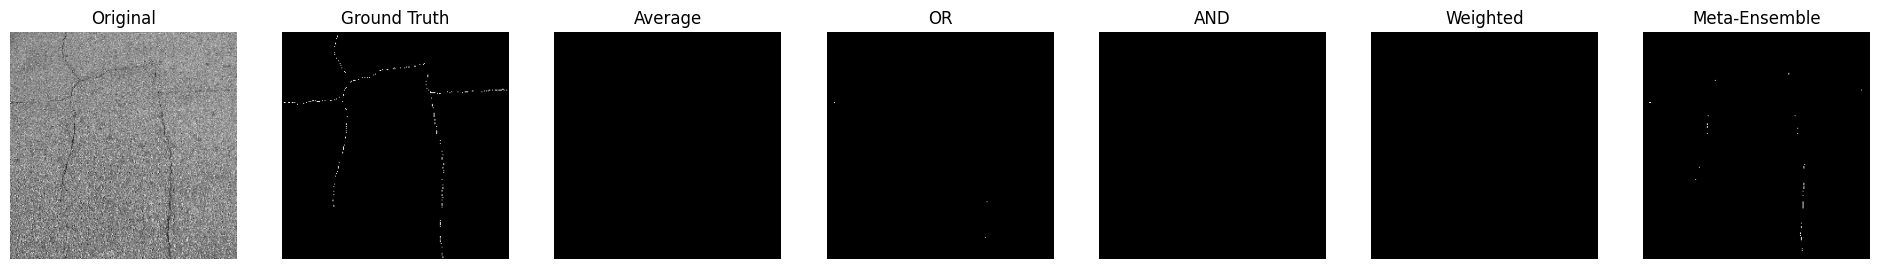

📂 Working on dataset: GAPS384
✅ Loaded 509 samples from GAPS384
✅ GAPS384: 407 train, 102 test samples
Unet
Epoch 1/10
40/41 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9878 - loss: 0.0564

2025-04-25 18:27:47.301012: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-04-25 18:27:47.421763: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-04-25 18:27:47.680464: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-04-25 18:27:47.812106: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-04-25 18:27:48.806667: E external/local_xla/xla/stream_

41/41 ━━━━━━━━━━━━━━━━━━━━ 16s 401ms/step - accuracy: 0.9878 - loss: 0.0563 - val_accuracy: 0.9885 - val_loss: 0.0466
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9880 - loss: 0.0480 - val_accuracy: 0.9886 - val_loss: 0.0447
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9883 - loss: 0.0456 - val_accuracy: 0.9889 - val_loss: 0.0433
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9881 - loss: 0.0446 - val_accuracy: 0.9889 - val_loss: 0.0414
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9886 - loss: 0.0426 - val_accuracy: 0.9889 - val_loss: 0.0440
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9890 - loss: 0.0415 - val_accuracy: 0.9890 - val_loss: 0.0397
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9885 - loss: 0.0410 - val_accuracy: 0.9892 - val_loss: 0.0378
Epoch 8/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9894 - loss: 0.0375 - val_accuracy: 0.9894 - val_loss: 

2025-04-25 18:28:44.990651: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'input_reduce_select_fusion_6', 4 bytes spill stores, 4 bytes spill loads



41/41 ━━━━━━━━━━━━━━━━━━━━ 14s 344ms/step - accuracy: 0.9877 - loss: 0.0664 - val_accuracy: 0.9880 - val_loss: 0.0804
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9878 - loss: 0.0588 - val_accuracy: 0.9883 - val_loss: 0.0764
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9869 - loss: 0.0596 - val_accuracy: 0.9883 - val_loss: 0.0657
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9879 - loss: 0.0547 - val_accuracy: 0.9884 - val_loss: 0.0601
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9878 - loss: 0.0536 - val_accuracy: 0.9884 - val_loss: 0.0545
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.9878 - loss: 0.0548 - val_accuracy: 0.9884 - val_loss: 0.0554
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9877 - loss: 0.0531 - val_accuracy: 0.9881 - val_loss: 0.0514
Epoch 8/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9877 - loss: 0.0534 - val_accuracy: 0.9879 - val_loss: 

2025-04-25 18:29:10.122078: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_7_0', 892 bytes spill stores, 856 bytes spill loads

2025-04-25 18:29:10.466868: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_7', 36 bytes spill stores, 36 bytes spill loads

2025-04-25 18:29:10.756131: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_41_0', 60 bytes spill stores, 60 bytes spill loads

2025-04-25 18:29:10.911220: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_7', 188 bytes spill stores, 180 bytes spill loads

2025-04-25 18:29:11.108475: I external/loca

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 712ms/step - accuracy: 0.9877 - loss: 0.0559

2025-04-25 18:29:29.855417: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'input_reduce_select_fusion_1', 64 bytes spill stores, 64 bytes spill loads



41/41 ━━━━━━━━━━━━━━━━━━━━ 31s 784ms/step - accuracy: 0.9877 - loss: 0.0558 - val_accuracy: 0.9885 - val_loss: 0.0443
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9887 - loss: 0.0440 - val_accuracy: 0.9890 - val_loss: 0.0401
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9886 - loss: 0.0412 - val_accuracy: 0.9892 - val_loss: 0.0397
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9894 - loss: 0.0373 - val_accuracy: 0.9892 - val_loss: 0.0384
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9895 - loss: 0.0369 - val_accuracy: 0.9893 - val_loss: 0.0384
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9897 - loss: 0.0363 - val_accuracy: 0.9895 - val_loss: 0.0368
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9890 - loss: 0.0371 - val_accuracy: 0.9895 - val_loss: 0.0363
Epoch 8/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9895 - loss: 0.0349 - val_accuracy: 0.9896 - val_loss: 

2025-04-25 18:29:46.709927: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_22', 208 bytes spill stores, 208 bytes spill loads

2025-04-25 18:29:46.867205: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_22', 60 bytes spill stores, 60 bytes spill loads

2025-04-25 18:29:47.024541: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_22_0', 408 bytes spill stores, 396 bytes spill loads



41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step - accuracy: 0.9877 - loss: 0.0669

2025-04-25 18:29:52.756352: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'input_reduce_select_fusion_1', 64 bytes spill stores, 64 bytes spill loads



41/41 ━━━━━━━━━━━━━━━━━━━━ 13s 321ms/step - accuracy: 0.9877 - loss: 0.0669 - val_accuracy: 0.9884 - val_loss: 0.0616
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9884 - loss: 0.0607 - val_accuracy: 0.9884 - val_loss: 0.0604
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9876 - loss: 0.0633 - val_accuracy: 0.9884 - val_loss: 0.0591
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9881 - loss: 0.0595 - val_accuracy: 0.9884 - val_loss: 0.0571
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9880 - loss: 0.0587 - val_accuracy: 0.9884 - val_loss: 0.0560
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9876 - loss: 0.0585 - val_accuracy: 0.9884 - val_loss: 0.0550
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9888 - loss: 0.0528 - val_accuracy: 0.9884 - val_loss: 0.0544
Epoch 8/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9877 - loss: 0.0573 - val_accuracy: 0.9884 - val_loss: 

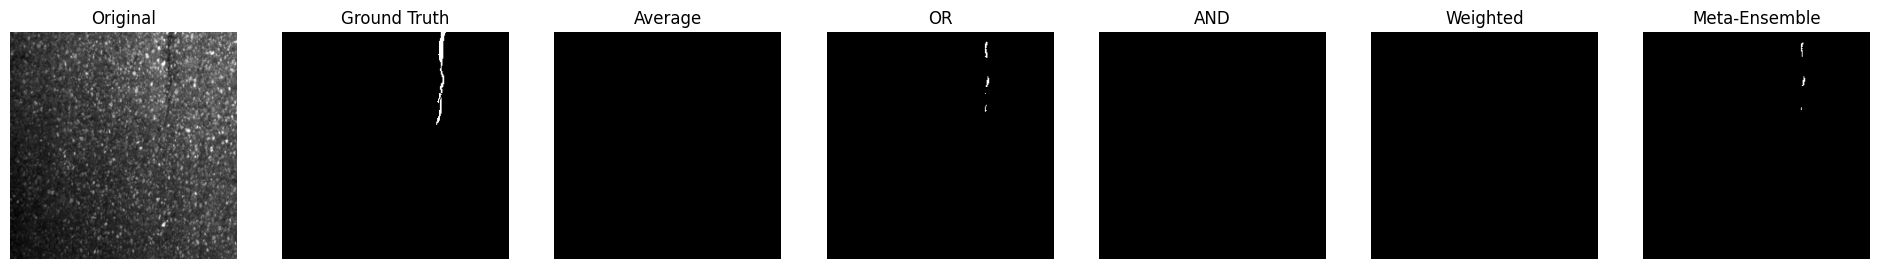

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from PIL import Image 

datasets = ["DeepCrack", "Crack500", "CrackTree200", "GAPS384"]
# datasets = ["DeepCrack"]

def threshold(pred, thresh=0.5):
    return (pred > thresh).astype(np.uint8)

for name in datasets:
    print(f"📂 Working on dataset: {name}")
    (X_train, X_test, Y_train, Y_test,F_train,F_test) = load_dataset(name)

    if X_train is None:
        print(f"⛔ Skipping {name} due to empty dataset.")
        continue

    print(f"✅ {name}: {len(X_train)} train, {len(X_test)} test samples")
    X_train, X_val, Y_train, Y_val, F_train, F_val = train_test_split(X_train, Y_train, F_train, test_size=0.2, random_state=42)

    # Train all models
    print("Unet")
    model_unet.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=10, batch_size=8)

    print("Attention Unet")
    model_attunet.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=10, batch_size=8)

    print("Residual Unet")
    model_raunet.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=10, batch_size=8)

    print("Trans Unet")
    model_transunet.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=10, batch_size=8)

    print("Swin Unet")
    model_swin.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=10, batch_size=8)

    # Predict on test set
    pred_unet = model_unet.predict(X_test)
    pred_attunet = model_attunet.predict(X_test)
    pred_raunet = model_raunet.predict(X_test)
    pred_transunet = model_transunet.predict(X_test)
    pred_swin = model_swin.predict(X_test)

    # Binary masks
    binary_preds = {
        "unet": threshold(pred_unet),
        "attunet": threshold(pred_attunet),
        "raunet": threshold(pred_raunet),
        "transunet": threshold(pred_transunet),
        "swin": threshold(pred_swin),
    }

    # OR, AND, AVG, WEIGHTED
    or_ensemble = np.clip(
        binary_preds["unet"] +
        binary_preds["attunet"] +
        binary_preds["raunet"] +
        binary_preds["transunet"] +
        binary_preds["swin"], 0, 1)

    and_ensemble = (
        binary_preds["unet"] *
        binary_preds["attunet"] *
        binary_preds["raunet"] *
        binary_preds["transunet"] *
        binary_preds["swin"])

    avg_ensemble = (
        pred_unet +
        pred_attunet +
        pred_raunet +
        pred_transunet +
        pred_swin) / 5.0
    avg_ensemble_binary = threshold(avg_ensemble)

    weights = {
        "unet": 0.15,
        "attunet": 0.20,
        "raunet": 0.25,
        "transunet": 0.20,
        "swin": 0.20
    }

    weighted_ensemble = (
        pred_unet * weights["unet"] +
        pred_attunet * weights["attunet"] +
        pred_raunet * weights["raunet"] +
        pred_transunet * weights["transunet"] +
        pred_swin * weights["swin"])
    weighted_ensemble_binary = threshold(weighted_ensemble)

    # =========================
    # Meta-Ensemble Starts Here
    # =========================
    print("🧠 Meta-Ensemble Training...")

    meta_input = np.stack([pred_unet, pred_attunet, pred_raunet, pred_transunet, pred_swin], axis=-1)
    meta_X = meta_input.reshape(-1, 5)
    meta_Y = Y_test.reshape(-1, 1)

    meta_X_train, meta_X_val, meta_Y_train, meta_Y_val = train_test_split(meta_X, meta_Y, test_size=0.2, random_state=42)

    meta_model = Sequential([
        Input(shape=(5,)),
        Dense(8, activation='relu'),
        Dense(4, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    meta_model.compile(optimizer=Adam(1e-3), loss='binary_crossentropy', metrics=['accuracy'])
    meta_model.fit(meta_X_train, meta_Y_train, validation_data=(meta_X_val, meta_Y_val), epochs=3, batch_size=1024)

    # Predict with meta model
    meta_preds_flat = meta_model.predict(meta_X, batch_size=1024)
    meta_preds = meta_preds_flat.reshape(pred_unet.shape)
    meta_preds_binary = threshold(meta_preds)

    print("🖼️ Saving Meta-Ensemble Results...")
    output_dir = os.path.join("Result", name, "meta_ensemble") # Dedicated subfolder
    os.makedirs(output_dir, exist_ok=True)

    # Save the meta-ensemble binary prediction for all test samples
    for i in range(len(X_test)):
        filename = F_test[i]
        base_name = os.path.splitext(filename)[0]
        output_path = os.path.join(output_dir, f"{base_name}_meta_ensemble_prediction.png")
        save_image(meta_preds_binary[i], output_path)
 

    # =========================
    # Visualize results
    # =========================
    def visualize(idx):
        fig, axs = plt.subplots(1, 7, figsize=(24, 4))
        axs[0].imshow(X_test[idx].squeeze(), cmap='gray')
        axs[0].set_title("Original")

        axs[1].imshow(Y_test[idx].squeeze(), cmap='gray')
        axs[1].set_title("Ground Truth")

        axs[2].imshow(avg_ensemble_binary[idx].squeeze(), cmap='gray')
        axs[2].set_title("Average")

        axs[3].imshow(or_ensemble[idx].squeeze(), cmap='gray')
        axs[3].set_title("OR")

        axs[4].imshow(and_ensemble[idx].squeeze(), cmap='gray')
        axs[4].set_title("AND")

        axs[5].imshow(weighted_ensemble_binary[idx].squeeze(), cmap='gray')
        axs[5].set_title("Weighted")

        axs[6].imshow(meta_preds_binary[idx].squeeze(), cmap='gray')
        axs[6].set_title("Meta-Ensemble")

        for ax in axs: ax.axis('off')
        plt.show()

    visualize(1)

# Save models
model_unet.save("saved_models/final_unet.h5")
model_attunet.save("saved_models/final_attunet.h5")
model_raunet.save("saved_models/final_raunet.h5")
model_transunet.save("saved_models/final_transunet.h5")
model_swin.save("saved_models/final_swinunet.h5")
meta_model.save("saved_models/meta_ensemble.h5")


**Quantification**

Folder 'Result/DeepCrack/meta_ensemble' found. Checking images...

Loading image: IMG_6472-3_meta_ensemble_prediction.png
IMG_6472-3_meta_ensemble_prediction.png: unique pixel values -> [  0 255]


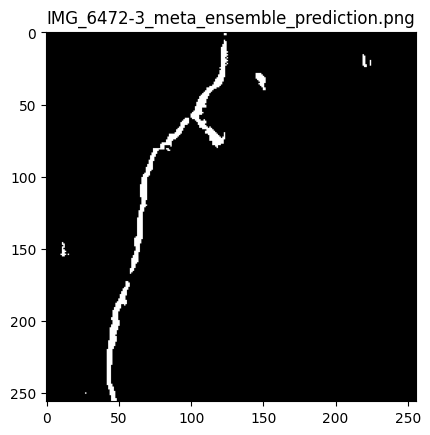

In [69]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

folder_path = "Result/DeepCrack/meta_ensemble"  # Change if needed

# Check if the folder exists
if not os.path.exists(folder_path):
    print(f"Folder '{folder_path}' not found.")
else:
    print(f"Folder '{folder_path}' found. Checking images...\n")
    
    files = [f for f in os.listdir(folder_path) if f.endswith('.png') or f.endswith('.jpg')]
    
    if not files:
        print("No image files found in the folder.")
    else:
        for file in files:
            img_path = os.path.join(folder_path, file)
            print(f"Loading image: {file}")

            # Load the image in grayscale
            mask = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

            if mask is not None:
                print(f"{file}: unique pixel values -> {np.unique(mask)}")

                # Show image
                plt.imshow(mask, cmap='gray')
                plt.title(file)
                plt.show()
                
                break  # Stop after the first image for now
            else:
                print(f"Failed to load image: {file}")


In [58]:
!pip install shapely

DEPRECATION: Loading egg at /usr/local/lib/python3.12/dist-packages/opt_einsum-3.4.0-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /usr/local/lib/python3.12/dist-packages/dill-0.3.9-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /usr/local/lib/python3.12/dist-packages/igraph-0.11.8-py3.12-linux-x86_64.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /usr/local/lib/python3.12/dist-packages/lightning_thunder-0.2.0.dev0-py3.12.egg is deprecated. pip 25.1 wil

In [82]:
import os
from glob import glob
import shutil

def move_masks_to_folder(dataset_name):
    # Define the root folder paths based on dataset
    if dataset_name == "DeepCrack":
        root = "Dataset/DeepCrack"
        mask_folders = [os.path.join(root, f"{folder}_lab") for folder in ["train", "test"]]
        
    elif dataset_name == "Crack500":
        root = "Dataset/Crack500"
        mask_folders = [os.path.join(root, "traincrop"), os.path.join(root, "valcrop"), os.path.join(root, "testcrop")]
        
    elif dataset_name == "CFD":
        mask_folders = ["Dataset/CFD/seg_gt"]
        
    elif dataset_name == "CrackTree200":
        mask_folders = ["Dataset/Cracktree200/cracktree200_gt"]
        
    elif dataset_name == "AEL":
        root = "Dataset/AEL"
        mask_folders = [
            os.path.join(root, "gt", subfolder) for subfolder in ["AIGLE_RN", "ESAR", "LCMS"]
        ]
        
    elif dataset_name == "GAPS384":
        mask_folders = ["Dataset/Gaps384/croppedgt"]
    
    else:
        print(f"⚠️ Unknown dataset: {dataset_name}")
        return
    
    # Create a folder to store the masks
    target_folder = f"Masks/{dataset_name}"
    os.makedirs(target_folder, exist_ok=True)
    
    # Loop through each mask folder and move the mask images
    for mask_folder in mask_folders:
        for mask_path in sorted(glob(f"{mask_folder}/*.png")):
            # Extract the base filename and move the file
            mask_name = os.path.basename(mask_path)
            target_path = os.path.join(target_folder, mask_name)
            shutil.copy(mask_path, target_path)
            print(f"✅ Moved mask: {mask_name} to {target_folder}")

    print(f"✅ All masks for {dataset_name} have been moved to {target_folder}")

# Example of usage
datasets = ["DeepCrack", "Crack500", "CrackTree200", "GAPS384"]
for dataset in datasets:
    move_masks_to_folder(dataset)


✅ Moved mask: 11111.png to Masks/DeepCrack
✅ Moved mask: 11112.png to Masks/DeepCrack
✅ Moved mask: 11113.png to Masks/DeepCrack
✅ Moved mask: 11114.png to Masks/DeepCrack
✅ Moved mask: 11115.png to Masks/DeepCrack
✅ Moved mask: 11116-1.png to Masks/DeepCrack
✅ Moved mask: 11116-2.png to Masks/DeepCrack
✅ Moved mask: 11116-3.png to Masks/DeepCrack
✅ Moved mask: 11116-4.png to Masks/DeepCrack
✅ Moved mask: 11116.png to Masks/DeepCrack
✅ Moved mask: 11117.png to Masks/DeepCrack
✅ Moved mask: 11118.png to Masks/DeepCrack
✅ Moved mask: 11119.png to Masks/DeepCrack
✅ Moved mask: 11120.png to Masks/DeepCrack
✅ Moved mask: 11121.png to Masks/DeepCrack
✅ Moved mask: 11122-1.png to Masks/DeepCrack
✅ Moved mask: 11122-2.png to Masks/DeepCrack
✅ Moved mask: 11122-3.png to Masks/DeepCrack
✅ Moved mask: 11122-4.png to Masks/DeepCrack
✅ Moved mask: 11122-5.png to Masks/DeepCrack
✅ Moved mask: 11122.png to Masks/DeepCrack
✅ Moved mask: 11123-1.png to Masks/DeepCrack
✅ Moved mask: 11123-2.png to Masks

In [85]:
import os
import cv2
import numpy as np
from skimage.morphology import skeletonize, closing, disk
from scipy.ndimage import distance_transform_edt
from skimage.util import img_as_ubyte
from shapely.geometry import LineString
import math

def calculate_skeleton_segments(skeleton):
    points = np.column_stack(np.where(skeleton))
    if len(points) < 2:
        return []

    segments = []
    segment_points = points
    segment_points = segment_points[np.argsort(segment_points[:, 0])]
    line = LineString(segment_points)
    segments.append(line)
    return segments

def calculate_segment_length(coords):
    """Calculates the length of a segment given its coordinates by summing the Euclidean distances between consecutive points."""
    length = 0.0
    for i in range(1, len(coords)):
        x1, y1 = coords[i - 1]
        x2, y2 = coords[i]
        length += math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
    return length

def get_crack_dimensions(binary_mask):
    crack = binary_mask.squeeze() > 0

    # Apply morphological closing to smooth the cracks
    closed_crack = closing(crack, disk(1))  # Modify the disk size to control the smoothing
    skeleton = skeletonize(closed_crack)
    dist_transform = distance_transform_edt(closed_crack)

    segments = calculate_skeleton_segments(skeleton)
    dimensions = []

    for segment in segments:
        coords = np.array(segment.coords, dtype=int)
        length = calculate_segment_length(coords)  # Correct length calculation
        
        widths = [
            dist_transform[y, x] * 2 
            for x, y in coords 
            if 0 <= y < dist_transform.shape[0] and 0 <= x < dist_transform.shape[1]
        ]
        width = np.mean(widths) if widths else 0
        dimensions.append((length, width, coords))
    return dimensions

def calculate_error(predicted_dims, ground_truth_dims):
    """Calculate the error between total predicted and ground truth dimensions."""
    # Sum total predicted lengths and widths
    total_pred_len = sum([length for length, _, _ in predicted_dims])
    total_pred_wid = np.mean([width for _, width, _ in predicted_dims]) if predicted_dims else 0

    # Sum total ground truth lengths and widths
    total_gt_len = sum([length for length, _, _ in ground_truth_dims])
    total_gt_wid = np.mean([width for _, width, _ in ground_truth_dims]) if ground_truth_dims else 0

    # Avoid division by zero
    eps = 1e-5
    mean_length_error = abs(total_pred_len - total_gt_len)
    mean_width_error = abs(total_pred_wid - total_gt_wid)

    relative_length_error = (mean_length_error / (total_gt_len + eps)) * 100
    relative_width_error = (mean_width_error / (total_gt_wid + eps)) * 100

    return mean_length_error, mean_width_error, relative_length_error, relative_width_error

def process_and_compare_images(folder_path_pred, folder_path_gt):
    errors = []

    for file_pred in os.listdir(folder_path_pred):
        if file_pred.endswith(".png") or file_pred.endswith(".jpg"):
            # Load the predicted crack mask
            pred_path = os.path.join(folder_path_pred, file_pred)
            pred_mask = cv2.imread(pred_path, cv2.IMREAD_GRAYSCALE)
            
            if pred_mask is None:
                print(f"Failed to read predicted image: {file_pred}")
                continue

            pred_mask = pred_mask > 127  # Binarize prediction mask
            predicted_dims = get_crack_dimensions(pred_mask)

            # Prepare ground truth file name
            gt_filename = file_pred.replace('_meta_ensemble_prediction', '')
            gt_path = os.path.join(folder_path_gt, gt_filename)

            if not os.path.exists(gt_path):
                print(f"Ground truth not found for: {file_pred}")
                continue

            gt_mask = cv2.imread(gt_path, cv2.IMREAD_GRAYSCALE)
            if gt_mask is None:
                print(f"Failed to read ground truth image: {gt_filename}")
                continue

            gt_mask = gt_mask > 127  # Binarize ground truth mask
            ground_truth_dims = get_crack_dimensions(gt_mask)

            # Compare predicted dimensions with ground truth dimensions
            mean_len_error, mean_wid_error, rel_len_error, rel_wid_error = calculate_error(predicted_dims, ground_truth_dims)
            errors.append((file_pred, mean_len_error, mean_wid_error, rel_len_error, rel_wid_error))

            print(f"Errors for {file_pred}:")
            print(f"  Mean Length Error (pixels): {mean_len_error:.2f}")
            print(f"  Mean Width Error (pixels): {mean_wid_error:.2f}")
            print(f"  Relative Length Error (%): {rel_len_error:.2f}")
            print(f"  Relative Width Error (%): {rel_wid_error:.2f}")

    return errors

# Set dataset folders for predicted and ground truth masks
datasets = ["DeepCrack", "Crack500", "CrackTree200", "GAPS384"]
for dataset in datasets:
    folder_path_pred = f"Result/{dataset}/meta_ensemble"
    folder_path_gt = f"Masks/{dataset}"

    # Run the comparison and error measurement
    errors = process_and_compare_images(folder_path_pred, folder_path_gt)



Errors for IMG_6472-3_meta_ensemble_prediction.png:
  Mean Length Error (pixels): 3526.73
  Mean Width Error (pixels): 0.21
  Relative Length Error (%): 654.78
  Relative Width Error (%): 175.59
Errors for 11156-1_meta_ensemble_prediction.png:
  Mean Length Error (pixels): 5207.74
  Mean Width Error (pixels): 0.07
  Relative Length Error (%): 52.46
  Relative Width Error (%): 26.55
Errors for 11236-3_meta_ensemble_prediction.png:
  Mean Length Error (pixels): 43492.53
  Mean Width Error (pixels): 0.08
  Relative Length Error (%): 77.52
  Relative Width Error (%): 62.96
Errors for 11163_meta_ensemble_prediction.png:
  Mean Length Error (pixels): 2543.26
  Mean Width Error (pixels): 0.00
  Relative Length Error (%): 78.44
  Relative Width Error (%): 0.00
Errors for 11296-6_meta_ensemble_prediction.png:
  Mean Length Error (pixels): 7292.60
  Mean Width Error (pixels): 0.20
  Relative Length Error (%): 91.10
  Relative Width Error (%): 75.15
Errors for 11157_meta_ensemble_prediction.png:
